<a href="https://colab.research.google.com/github/jazzc001/courseratoolsfordatascience/blob/main/00_tensorflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#In this notebook, we are going to cover some of the most fundamental concepts of tensors using TensorFlow

More sepcifically, we're going to cover:
* Introduction to tensors
* Getting information from tensors
* Manipulating tensors
* Tensors & NumPy
* Using @tf.function (a way to speed up your regular python functions)
* Using GPUs with TensorFlow (or TPUs)
* Exercises to try for yourself

#Introduction to Tensors

In [3]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.5.0


In [4]:
# Create tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [5]:
# Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [6]:
#Create a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [7]:
#check the dimension of our vector
vector.ndim

1

In [8]:
#create a matrix (has more than 1 dimension)
matrix = tf.constant([[10, 7], [7, 10]])
matrix


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [9]:
matrix.ndim


2

In [10]:
# create another matrix
another_matrix = tf.constant([[10., 7.],
                              [3., 2.],
                             [8., 9.]], dtype = tf.float16) #specify the data type with dtype parameter

another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [11]:
#What's the number of the ndim of another_matrix would be?
another_matrix.ndim

2

In [12]:
# Let's create a tensor
tensor = tf.constant([[[1, 2, 3],[4, 5, 6]],
                      [[6, 7, 8], [10, 11, 12]],
                      [[12, 13, 14],[15,16,17]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 6,  7,  8],
        [10, 11, 12]],

       [[12, 13, 14],
        [15, 16, 17]]], dtype=int32)>

In [13]:
tensor.ndim

3

In [15]:
#What we've created so far:

* Scalar: a single number
* Vector: a number with direction (e.g wind speed and direction)
* Matrix: a 2-dimensional array of numbers
* Tensor: an n-dimensional array of numbers (when n can be any number, a 0-dimensional tensor is a scalar, a 1-dimensional tensor is a vector)

SyntaxError: ignored

In [16]:
# Creating tensors with tf.Variable
changable_tensor = tf.Variable([10, 7])
unchangable_tensor = tf.constant([10, 7])
changable_tensor, unchangable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [17]:
# Let's try change one of the elements in our changable tensor
changable_tensor[0] = 7
changable_tensor

TypeError: ignored

In [ ]:
#How about we try .assign()

changable_tensor[0].assign(7)
changable_tensor

In [18]:
# Let's try to change our unchangable tensor
unchangable_tensor[0].assign(7)
unchangable_tensor

AttributeError: ignored

In [ ]:
### Creating random tensors

Random tensors are tensors of some abitrary size which contain random numbers.

In [ ]:
# Create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42) #set seed for reproducibility
random_1 = random_1.normal(shape=(3, 2))
random_2 = tf.random.Generator.from_seed(42) 
random_2 = random_2.normal(shape =(3,2))

#Are they equal?
random_1, random_2, random_1 == random_2

In [ ]:
#Suffle the order of elements in a tensor

In [19]:
# shuffle a tensor (valuable for when you want to shuffle your data so the interent order doesn't affect learning)
not_shuffled = tf.constant([[10,7],
                           [3,4],
                           [2, 5]])
not_shuffled.ndim

# Shuffle our non-shuffled tensor
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [10,  7],
       [ 2,  5]], dtype=int32)>

**Exercise: ** Read through TensorFlow documentation on random seed generation: https://www.tensorflow.org/api_docs/python/tf/random/set_seed
and practice writing 5 random tensors and shuffle them.

It lookds like if we want our shuffled tensors to be in the same order, we've got to use the global level random seed as well as the operation level random seed:

>Rule 4: "If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence.

In [20]:
# Shuffle our non-shuffled tensor
tf.random.set_seed(31)
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 2,  5],
       [ 3,  4]], dtype=int32)>

In [21]:
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed = 42)


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [22]:
#Other ways to make tensor

In [23]:
# Create a tensor of all ones
tf.ones({10,7})

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [24]:
#Create a tensor of all zeros
tf.zeros(shape = [3,4])


<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Trun NumPy arrays into tensors

The main difference between NumPy arrays and TensorFlow tensors is that tensors can be run on a GPU (much faster for numberical computing).

In [25]:
#You can also turn NumPy arrays into tensors
import numpy as np
numpy_A = np.arange(1, 25, dtype = np.int32) #create a NumPy array between 1 and 25
numpy_A

#X = tf.constant(some_matrix) #capital for matrix or tensor
#y = tf.constant(vector) #non-capital for vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [26]:
A = tf.constant(numpy_A, shape=(2,3,4))
A
A.ndim

3

In [27]:
## Getting information from tensors
When dealing with tensors you probaly want to be aware of the following attributes:
*Shape
*Rank
* Axis or dimension
* Size

SyntaxError: ignored

In [ ]:
#Creat a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros(shape = [2,3,4,5])
rank_4_tensor

In [ ]:
rank_4_tensor[1]

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

In [28]:
#Get various attributes of our tensor
print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimension (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along the 0 axis:", rank_4_tensor.shape[0])
print("Elements along the last axis:", rank_4_tensor.shape[-1]) #call -1 as last one = 4th element
print("Total number of elements in our tensor:", tf.size(rank_4_tensor).numpy()) #add .numpy() at the end of a tensor can change it to a numpy

NameError: ignored

## Indexing tensors

tensors can be indexed just like python lists.

In [ ]:
some_list = [1, 2, 3, 4]
some_list[:2]

In [29]:
# Get the first 2 elements of each dimension
rank_4_tensor[:2, :2, :2, :2]

NameError: ignored

In [30]:
some_list[:1]

NameError: ignored

In [31]:
# Get the first element from each dimension from each index except for the final one
rank_4_tensor[:1,:1,:1,:]

NameError: ignored

In [ ]:
# Get the first element from each dimension from each index except for the second final one
rank_4_tensor[:1,:1,:,:1]

In [ ]:
# Get the first element from each dimension from each index except for the second one and second last one
rank_4_tensor[:1,:,:,:1]

In [ ]:
# Get the first element from each dimension from each index except for the first one
rank_4_tensor[:,:1,:1,:1]

In [ ]:
# Creat a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[1,2],
                             [3,4]])
rank_2_tensor, rank_2_tensor.ndim, rank_2_tensor.shape


In [32]:
some_list, some_list[-1]

NameError: ignored

In [ ]:
# Get the last element from each dimension rank 2
rank_2_tensor[:, -1]

In [ ]:
# Add in extra dimension to our rank 2 tensor
rank_3_tensor = rank_2_tensor[..., tf.newaxis]
rank_3_tensor

In [ ]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis-1) #"-1" means expand the final axis

In [ ]:
tf.expand_dims(rank_2_tensor, axis = 0) # expand the 0-axis

###Manipulating Tensors (tensor operions)
** Basic Operations**

+, -, *, /

In [ ]:
# You can add values to a tensor using the addition operator
tensor = tf.constant([[10, 7], [3, 4]])
tensor + 10 #this should be equal to tf.math.add(tensor, 10)

In [33]:
#Original tensor is unchanged
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 6,  7,  8],
        [10, 11, 12]],

       [[12, 13, 14],
        [15, 16, 17]]], dtype=int32)>

In [34]:
# Substration if you want
tensor - 10

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[-9, -8, -7],
        [-6, -5, -4]],

       [[-4, -3, -2],
        [ 0,  1,  2]],

       [[ 2,  3,  4],
        [ 5,  6,  7]]], dtype=int32)>

In [35]:
# We can use the tensorflow built-in function too
tf.multiply(tensor, 10)

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 10,  20,  30],
        [ 40,  50,  60]],

       [[ 60,  70,  80],
        [100, 110, 120]],

       [[120, 130, 140],
        [150, 160, 170]]], dtype=int32)>

**Matrix Multiplication**

In machine learning, matrix muliplication is one of the most common tensor opearation.

There are two rules our tensors (or matrices) need to fulfill if we are going to matrix multiply them:

1. The inner dimensions must match
2. The resulting matrix has the shape of the inner dimensions

In [36]:
# Matrix mulipliction in tensorflow
print (tensor)
tf.matmul(tensor, tensor)

tf.Tensor(
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 6  7  8]
  [10 11 12]]

 [[12 13 14]
  [15 16 17]]], shape=(3, 2, 3), dtype=int32)


InvalidArgumentError: ignored

In [ ]:
tensor, tensor

In [ ]:
tensor * tensor

In [ ]:
#Matrix mutliplication  with Python operation "@"
tensor @ tensor

In [37]:
tensor.shape

TensorShape([3, 2, 3])

In [38]:
#Create a tensor (3, 2) tensor
X = tf.constant ([[1, 2],
                  [3, 4],
                  [5, 6]])
#Create another (3, 2) tensor
Y = tf.constant([[7, 8],
                  [9, 10],
                  [11, 12]])

In [39]:
#Try to matrix multiply tensors of same shape
tf.matmul(X, Y)

InvalidArgumentError: ignored

**Resource:** Info and example of matrix multiplication: https://www.mathsisfun.com/algebra/matrix-multiplying.html

In [40]:
tf.linalg.inv(Y, adjoint=False)

InvalidArgumentError: ignored

In [41]:
# Let's change the shape of Y
tf.reshape(Y, shape=(2, 3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [42]:
X.shape, tf.reshape(Y, shape=(2, 3)).shape

(TensorShape([3, 2]), TensorShape([2, 3]))

In [43]:
# Try to matrix multiply X by reshaped Y
tf.matmul(X, tf.reshape(Y, shape=(2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [44]:
# Try to matrix multiply reshaped X by Y
tf.matmul( tf.reshape(X, shape=(2, 3)), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]], dtype=int32)>

In [45]:
X @ tf.reshape(Y, shape=(2, 3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [46]:
# Can do teh same with transpose
X, tf.transpose(X), tf.reshape(X, shape=(2, 3))

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

In [47]:
# Try matrix multiplication with transpose rather than reshape
tf.matmul(tf.transpose(X), Y), tf.matmul(tf.reshape(X, shape=(2, 3)), Y)

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 89,  98],
        [116, 128]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 58,  64],
        [139, 154]], dtype=int32)>)

Resources: Info and examle of matrix multiplication: https://www.mathsisfun.com/algebra/matrix-multiplying.html

** The dot product**


Matrix Multiplication is also referred to as the dot prodcut.

You can perform matrix multiplication using:



*   `tf.matmul()`
*   `tf.tensordot()`
*   `@`


```
# This is formatted as code
```





In [48]:
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [49]:
# Perform the dot product on X and Y (requires X or Y to be transposed)
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [50]:
# Perform matrix multiplication between X and Y (transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [51]:
# Perform matrix multiplication between X and Y (reshaped)
tf.matmul(X, tf.reshape(Y, shape=(2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [52]:
# Check the value of Y, reshape Y and transposed Y

print("Normal Y:")
print(Y, "\n") #"\n" is for newline

print("Y reshaped to (2, 3): ")
print(tf.reshape(Y, shape=(2, 3)), "\n")

print("Y reshaped to (2, 3): ")
print(tf.transpose(Y),"\n")

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2, 3): 
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y reshaped to (2, 3): 
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32) 



Genearlly, when performing matrix multiplication on two tensors and one of the axes doesn't line up, you will transpose (rather than reshape) one of the tensors to get satisfy the matrix multiplication rules.

### Changing the datatype of a tensor

In [53]:
tf.__version__

'2.5.0'

In [54]:
#Create a new tensor with default datatype(float32)
B = tf.constant([1.7, 7.4])
B.dtype

tf.float32

In [55]:
C = tf.constant([7, 10])
C.dtype

tf.int32

In [56]:
# Change from float32 to float 16 (float precision)
D = tf.cast(B, dtype=tf.float16)
D, D.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>,
 tf.float16)

In [57]:
# Change from int32 to float32
E = tf.cast(C, dtype=tf.float32)
E

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>

In [58]:
E_float16 = tf.cast(E, dtype=tf.float16)
E_float16


<tf.Tensor: shape=(2,), dtype=float16, numpy=array([ 7., 10.], dtype=float16)>

### Aggregration tensors

Aggregating tensors = condensing them from multiple values down to a smaller amount of values.

In [59]:
# Get the absolute values
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [60]:
# Get the absolute values
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

# Let's go through the following forms of aggregation:
* Get the minimum
* Get the maximum
* Get the mean of a tensor
* Get the sum of a tensor

In [61]:
# Create a random tensor with values between 0 and 100 of size 50
E = tf.constant(np.random.randint(0, 100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([20, 72, 45, 29, 97, 14,  6, 21, 29, 77, 60, 59, 19, 23, 99, 13, 99,
       12, 17, 14, 63, 79, 55, 89, 17, 29, 74, 81, 40, 60, 22, 10, 60, 68,
       96, 29, 97, 24, 28, 33,  6,  6, 77, 34, 87, 41, 98, 35, 99, 61])>

In [62]:
tf.size(E), E.shape, E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [63]:
# Find the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=6>

In [64]:
# Find the maximum
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=99>

In [65]:
# Find the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=48>

In [66]:
# Find the sum
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2423>

Exercies: with what we've just learned, find the variance and standard deviation of our E tensor using TensorFlow methods.

In [67]:
# Find the variance
tf.math.reduce_variance(E)

TypeError: ignored

In [69]:
#To find teh variance of our tensor, we need access to tensorflow_probability

import tensorflow_probability as tfp

In [70]:
tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=int64, numpy=945>

In [71]:
#Find the Standard Deviation
tf.math.reduce_std(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=30.74359>

In [72]:
tf.math.reduce_std(E)

TypeError: ignored

In [73]:
#Find the variance of our E tensor
tf.math.reduce_variance(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=945.16833>

** Find the positional maximum and minimum



In [106]:
# Create a new tensor for finding positional minimum and maximum
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.8937987 , 0.43776572, 0.83387184, 0.6703849 , 0.7216798 ,
       0.86943173, 0.54742575, 0.57897806, 0.40581357, 0.33451593,
       0.18743455, 0.31529808, 0.4144038 , 0.70901597, 0.07722998,
       0.5190139 , 0.9321145 , 0.11467326, 0.47249925, 0.15570831,
       0.66262126, 0.64640594, 0.65028846, 0.2600894 , 0.99700594,
       0.10780168, 0.8822334 , 0.65541565, 0.68591726, 0.4961207 ,
       0.56568956, 0.6139103 , 0.0126065 , 0.4415189 , 0.47879303,
       0.14201498, 0.16224837, 0.9041022 , 0.7532749 , 0.66275036,
       0.38586116, 0.85653543, 0.7811507 , 0.03921056, 0.8824413 ,
       0.57388675, 0.42614317, 0.4770161 , 0.7405988 , 0.59374905],
      dtype=float32)>

In [107]:
# Find the positional maximum
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=24>

In [108]:
# Index on our largest value position
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.99700594>

In [109]:
#Find the max value of F
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.99700594>

In [80]:
#Check for equality
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [88]:
# Find the positional Minimum
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=30>

In [84]:
# Index on our largest value position
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.013772249>

In [85]:
#Find the max value of F
tf.reduce_min(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.013772249>

In [86]:
#Check for equality
F[tf.argmin(F)] == tf.reduce_min(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

### Squeezing a tensor(removing all single dimensions)

removes dimensions of size 1 from the shape of a tensor.

In [113]:
#Create a tensor to get started
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape= (1, 1, 1, 1, 50))
G, G.shape

(<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
 array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
            0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
            0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
            0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
            0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
            0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
            0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
            0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
            0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
            0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
       dtype=float32)>, TensorShape([1, 1, 1, 1, 50]))

In [110]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [114]:
G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       dtype=float32)>, TensorShape([50]))

### One-hot encoding

Reference: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

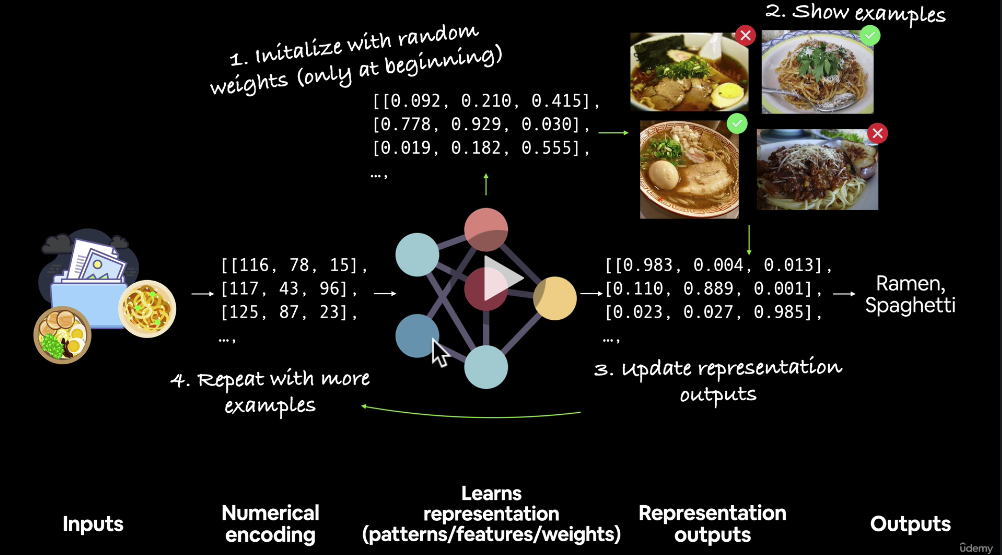


###one-hot coding is part of numerical coding



In [115]:
#create a list of indices
some_list = [0,1,2,3] #coudl be red, green, blue, purple
# One hot encode our list of indices
tf.one_hot(some_list, )

TypeError: ignored

In [119]:
#create a list of indices
some_list = [0, 1, 2, 3] #coudl be red, green, blue, purple
depth = 4
# One hot encode our list of indices
tf.one_hot(some_list,depth)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [125]:
# specify custom values for one hot encoding
tf.one_hot(some_list, depth, on_value = "2", off_value="3")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'2', b'3', b'3', b'3'],
       [b'3', b'2', b'3', b'3'],
       [b'3', b'3', b'2', b'3'],
       [b'3', b'3', b'3', b'2']], dtype=object)>

### Squaring, log, square root

In [127]:
# Create a new tensor
H = tf.range(1, 10)
H


<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [128]:
#Squrae it
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [129]:
#find the square root (will error, method requries non-int type)
tf.sqrt(H)

InvalidArgumentError: ignored

Back to see how to change datatype

https://colab.research.google.com/drive/18CC5NfTu0x8l-BCkOpDrAApmLPnZ8QtC#scrollTo=azWEfntmecKn&line=1&uniqifier=1

In [134]:
tf.square(tf.cast(H, dtype = tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=array([ 1.,  4.,  9., 16., 25., 36., 49., 64., 81.], dtype=float32)>

In [135]:
#Find the log
tf.math.log(H)

AttributeError: ignored

In [136]:
tf.math.log(tf.cast(H, dtype = tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

###Tensors and NumPy

TensorFlow interacts beautifully with NumPy arrays.

Note: One of the main differences between a TensorFlow tensor and a NumPy array is that a TensorFlow tensor can run a GPU or TPY for a faster processsing.

In [138]:
# Create a tensor directly form a NumPy array
J = tf.constant(np.array([3., 7., 10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [139]:
#Convert our tensor back to a Numpy array
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [140]:
# Conver tensor J to a NumPy array 
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [146]:
# the default types of each are slightly different
numpy_J = tf.constant(np.array([3.,  7., 10.]))
tensor_J = tf.constant([3.,  7., 10.])
#Check the datatypes of each
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

In [147]:
### Findign access to GPUs

In [2]:
import tensorflow as tf
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [4]:
!nvidia-smi

Mon Aug 16 17:14:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    60W / 149W |    122MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Note:** if you have access to a CUDA-enabel GPU, tensorflow will automatically use it whenever possible.